In [1]:
import pandas as pd
import numpy as np
import pickle
from SyntheticControlMethods import Synth, DiffSynth
from statsmodels.tsa.seasonal import seasonal_decompose

In [94]:
df_final = pd.read_csv('combined-remote-data-long-form.csv')

In [95]:
df_final.head()

,date,gp,surface_net_solar_radiation,total_precipitation,v_component_of_wind_10m,u_component_of_wind_10m,temperature_2m,ndvi
0,951523200,Aavani,10236426.0,0.017079,0.970727,-1.576569,294.716051,0.009761
1,951609600,Aavani,7736018.0,0.005458,0.115210,-2.675529,293.734249,-0.000413
2,951696000,Aavani,11948586.0,0.002365,-0.756280,-3.093911,294.242326,0.033495
3,951782400,Aavani,14465360.0,0.000034,-0.675090,-2.529456,294.096011,0.295038
4,951868800,Aavani,21490322.0,0.000001,-0.168866,-1.951295,294.255490,0.288335


In [96]:
df_final['gp'].unique()

array(['Aavani', 'Abbenahalli', 'Abludu', 'Addagal', 'Addagallu',
       'Agalagurki', 'Agalakuppe', 'Agara', 'Ajjiwara', 'Alakapura',
       'Alambadi Jothenahalli', 'Alangur', 'Alipura',
       'Alooru Duddanahalli', 'Ambikallu', 'Ammanallur',
       'Angarekanahalli', 'Angondahalli', 'Annenahalli', 'Anneswara',
       'Anoor', 'Anugondanahalli', 'Anur', 'Arabhikothanur', 'Arahalli',
       'Araleri', 'Aralumallige', 'Arebommanahalli', 'Arikunte', 'Aroodi',
       'Aruuru', 'Avagurki', 'Avathi', 'B.Bommasandra', 'Baktharahalli',
       'Balamande', 'Baliganahalli', 'Balla', 'Banahalli',
       'Bashetnahalli', 'Batlahallai', 'Beechaganahally',
       'Beglihosahalli', 'Belamaranahalli', 'Bellur', 'Bethamangala',
       'Bettakote', 'Bevinahally', 'Bhaktharahalli', 'Bhoomishettihalli',
       'Bidaluru', 'Bijjavara', 'Billur', 'Boodigere', 'Boodihal',
       'Boodikote', 'Burudagunte', 'Bychapura', 'Bylanarasapura',
       'Byraganahalli', 'Byrakur', 'Chakavelu', 'Chaldiganahalli',
  

Chikkathirupathi
Dhulappalli


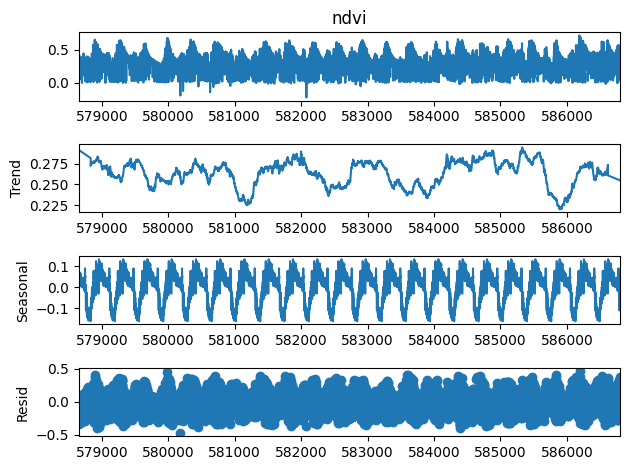

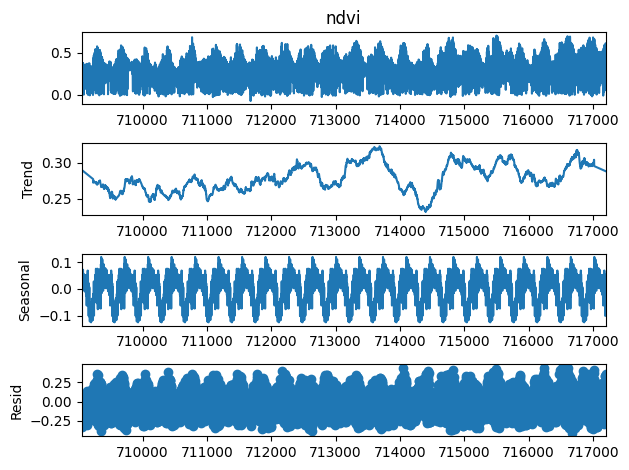

In [110]:
# Decompose the NDVI data for some testing GPs
test_gp_1 = 'Chikkathirupathi'
test_gp_2 = 'Dhulappalli'

decompose_1 = seasonal_decompose(df_final[df_final['gp'] == test_gp_1]['ndvi'], model='additive', period=365, extrapolate_trend='freq')
decompose_2 = seasonal_decompose(df_final[df_final['gp'] == test_gp_2]['ndvi'], model='additive', period=365, extrapolate_trend='freq')

print(test_gp_1)
decompose_1.plot()
print(test_gp_2)
decompose_2.plot()

test_trend_1 = decompose_1.trend
test_trend_2 = decompose_2.trend

In [111]:
# Keep only the trend component for NDVI for each GP
def remove_seasonality(df):
    return seasonal_decompose(df, model="additive", period=365, extrapolate_trend='freq').trend
    
df_final['ndvi_trend'] = df_final.groupby('gp')['ndvi'].apply(remove_seasonality)

/var/folders/ks/y2lx7f5n4l35503ywpy54pn80000gn/T/ipykernel_44428/3394104506.py:4: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df_final['ndvi_trend'] = df_final.groupby('gp')['ndvi'].apply(remove_seasonality)


In [112]:
df_final.head()

,date,gp,surface_net_solar_radiation,total_precipitation,v_component_of_wind_10m,u_component_of_wind_10m,temperature_2m,ndvi,ndvi_trend
0,951523200,Aavani,10236426.0,0.017079,0.970727,-1.576569,294.716051,0.009761,0.263979
1,951609600,Aavani,7736018.0,0.005458,0.115210,-2.675529,293.734249,-0.000413,0.263870
2,951696000,Aavani,11948586.0,0.002365,-0.756280,-3.093911,294.242326,0.033495,0.263760
3,951782400,Aavani,14465360.0,0.000034,-0.675090,-2.529456,294.096011,0.295038,0.263650
4,951868800,Aavani,21490322.0,0.000001,-0.168866,-1.951295,294.255490,0.288335,0.263541


In [113]:
# Make sure trend values are correctly set
assert(np.array_equal(df_final[df_final['gp'] == test_gp_1]['ndvi_trend'].values, test_trend_1.values))
assert(np.array_equal(df_final[df_final['gp'] == test_gp_2]['ndvi_trend'].values, test_trend_2.values))

In [117]:
# Try out the synthetic control method for a random date and GP
sc = Synth(df_final, "ndvi_trend", "gp", "date", 1451782400, "Dibburahalli", pen=0)

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.18874D+00    |proj g|=  8.57143D-01

At iterate    3    f=  2.07160D+00    |proj g|=  8.56961D-01
  ys=-1.831E-12  -gs= 1.372E-06 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      6    104     19     1     7   8.572D-01   2.062D+00
  F =   2.0621473849258480     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.22882D+00    |proj g|=  8.79719D-01



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



At iterate    3    f=  2.20950D+00    |proj g|=  3.69451D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      3      9      9     0     3   3.695D-02   2.209D+00
  F =   2.2094954273982061     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.23586D+00    |proj g|=  9.99916D-01

At iterate    3    f=  3.23585D+00    |proj g|=  3.96992D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      5     69     18     0     7   8.154D-01   3.236D+00
  F =   3.2358528667107169     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.30201D+00    |proj g|=  9.94902D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



At iterate    3    f=  3.30200D+00    |proj g|=  9.57689D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      3     56     16     0     7   9.577D-01   3.302D+00
  F =   3.3020045481689011     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.13995D+00    |proj g|=  9.78827D-01

At iterate    3    f=  1.93923D+00    |proj g|=  9.99997D-01
  ys=-1.619E-08  -gs= 1.620E-05 BFGS update SKIPPED

At iterate    6  


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     10    119     23     4     7   1.000D+00   1.917D+00
  F =   1.9170762063023603     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.41471D+00    |proj g|=  9.64425D-01

At iterate    3    f=  3.41470D+00    |proj g|=  7.08798D-01
  ys=-1.903E-10  -gs= 2.645E-10 BFGS update SKIPPED

At iterate    6    f=  3.41469D+00    |proj g|=  2.91202D-01
  ys=-7.343E-07  -


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      7     89     20     2     7   2.912D-01   3.415D+00
  F =   3.4146933379234330     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.20516D+00    |proj g|=  8.68934D-01
  ys=-8.066E-12  -gs= 4.605E-11 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      3     74     16     1     7   8.689D-01   3.205D+00
  F =   3.2051592368831430     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.25628D+00    |proj g|=  3.60164D-01



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate    3    f=  3.25628D+00    |proj g|=  6.39836D-01


  ascent direction in projection gd =    1.5914953653069003E-005

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      5     97     25     0     7   3.602D-01   3.256D+00
  F =   3.2562823382892043     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.23951D+00    |proj g|=  9.82340D-01



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



At iterate    3    f=  3.23950D+00    |proj g|=  5.18598D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      5     47     11     0     0   5.186D-01   3.240D+00
  F =   3.2395036862562772     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.29148D+00    |proj g|=  9.31639D-01
  ys=-1.540E-06  -gs= 1.685E-06 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate    3    f=  3.29147D+00    |proj g|=  4.60655D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      5     99     25     1     7   4.607D-01   3.291D+00
  F =   3.2914741175196549     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.


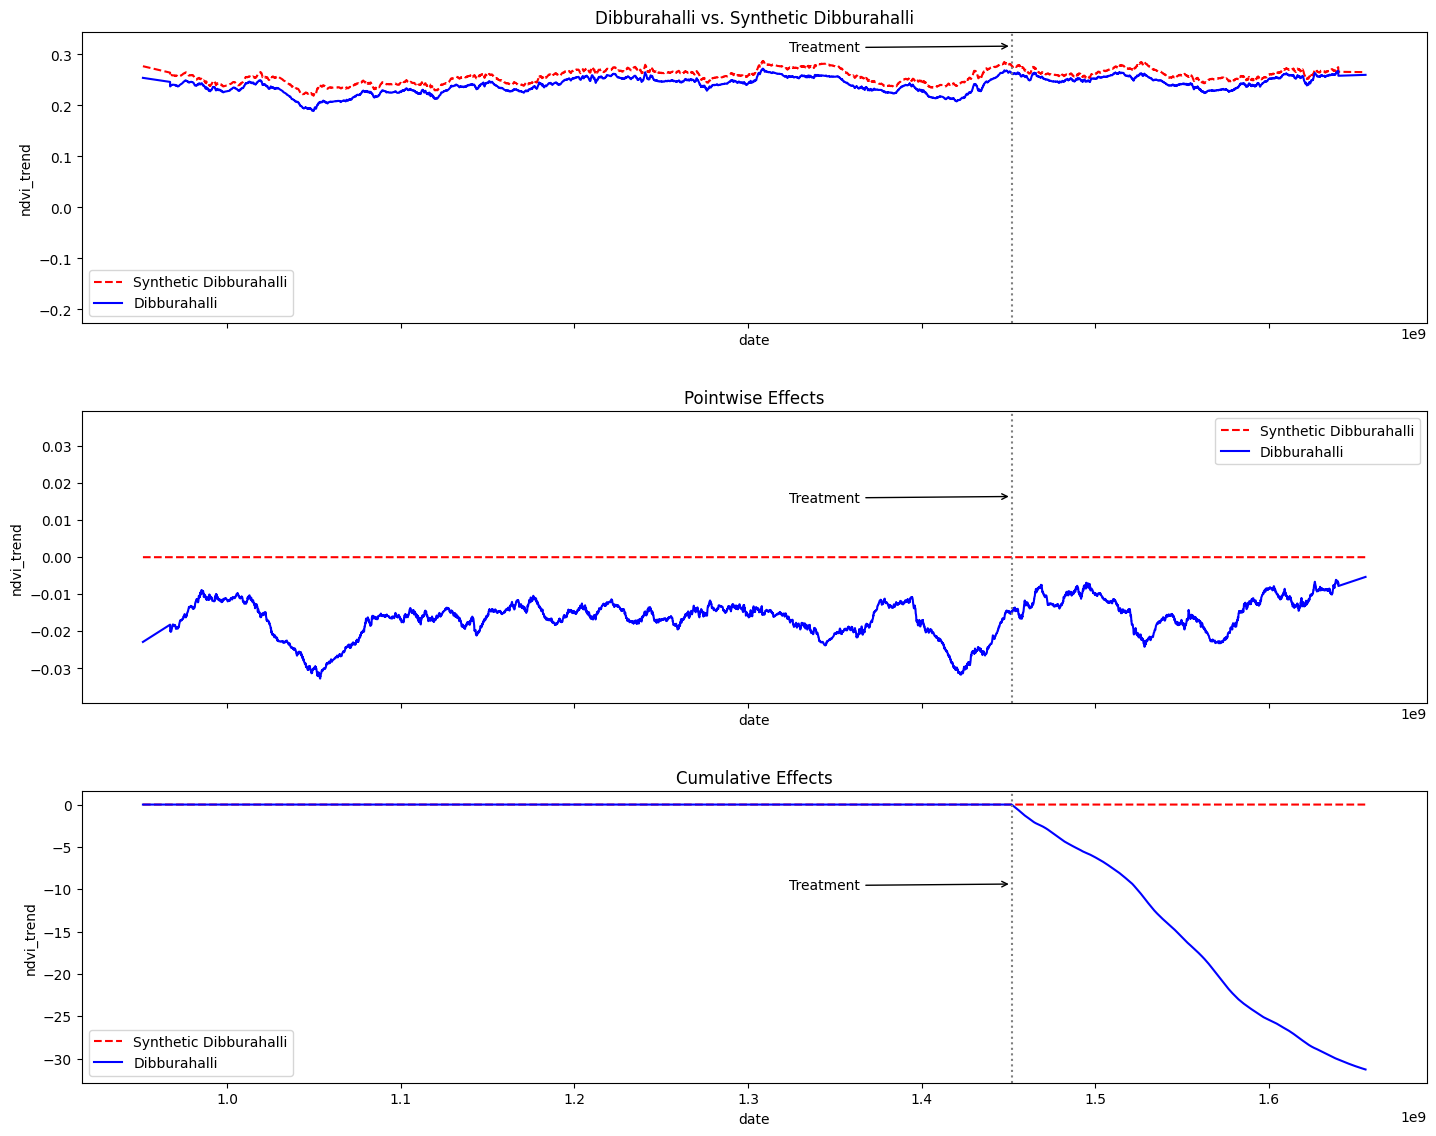

In [131]:
sc.plot(["original", "pointwise", "cumulative"], treated_label="Dibburahalli", 
            synth_label="Synthetic Dibburahalli", treatment_label="Treatment")

In [156]:
# Load the worksl3 dataframe from the previous notebook
import pickle
works_l3 = None
with open('worksl3.pickle', 'rb') as handle:
    works_l3 = pickle.load(handle)

In [157]:
works_l3.head()

,work_started_date,master_work_category_name,work_category_name,work_type,relevance,map_gpname,days-before-next-asset
0,2016-02-16,B--INDIVIDUAL ASSETS FOR VULNERABLESECTIONS (O...,Works on Individuals Land (Category IV),IAY Houses,irrelevant,Abludu,1 days
1,2016-08-29,B--INDIVIDUAL ASSETS FOR VULNERABLESECTIONS (O...,Works on Individuals Land (Category IV),IAY Houses,irrelevant,Abludu,1 days
2,2016-11-29,B--INDIVIDUAL ASSETS FOR VULNERABLESECTIONS (O...,Works on Individuals Land (Category IV),IAY Houses,irrelevant,Abludu,13 days
3,2016-02-15,B--INDIVIDUAL ASSETS FOR VULNERABLESECTIONS (O...,Works on Individuals Land (Category IV),IAY Houses,irrelevant,Bashetnahalli,1 days
4,2016-02-18,B--INDIVIDUAL ASSETS FOR VULNERABLESECTIONS (O...,Works on Individuals Land (Category IV),IAY Houses,irrelevant,Bashetnahalli,19 days


In [158]:
# Remove the irrelevant works
works_l3 = works_l3[works_l3['relevance'] != 'irrelevant']

In [159]:
works_l3

,work_started_date,master_work_category_name,work_category_name,work_type,relevance,map_gpname,days-before-next-asset
363,2016-03-24,B--INDIVIDUAL ASSETS FOR VULNERABLESECTIONS (O...,Works on Individuals Land (Category IV),Boundary Plntation-Farm Forestry Trees(Individ...,vegetation/plantation,Abludu,14 days
364,2016-02-19,B--INDIVIDUAL ASSETS FOR VULNERABLESECTIONS (O...,Works on Individuals Land (Category IV),Boundary Plntation-Farm Forestry Trees(Individ...,vegetation/plantation,Handiganala,22 days
365,2019-10-04,B--INDIVIDUAL ASSETS FOR VULNERABLESECTIONS (O...,Works on Individuals Land (Category IV),Boundary Plntation-Farm Forestry Trees(Individ...,vegetation/plantation,Melur,72 days
366,2016-01-06,B--INDIVIDUAL ASSETS FOR VULNERABLESECTIONS (O...,Works on Individuals Land (Category IV),Block Plantation-Hort-Trees in fields-Individuals,vegetation/plantation,Abludu,30 days
367,2016-02-09,B--INDIVIDUAL ASSETS FOR VULNERABLESECTIONS (O...,Works on Individuals Land (Category IV),Block Plantation-Hort-Trees in fields-Individuals,vegetation/plantation,Abludu,3 days
...,...,...,...,...,...,...,...
2159,2014-01-08,A--PUBLIC WORKS RELATING TO NATURAL RESOURCES ...,Drought Proofing,Road Line Plantation of Forestry Trees for Comm,vegetation/plantation,Thimmasandra,403 days
2161,2017-10-02,A--PUBLIC WORKS RELATING TO NATURAL RESOURCES ...,Rural Drinking Water,DUGWELLS,water,Thimmasandra,5 days
2163,2017-06-15,A--PUBLIC WORKS RELATING TO NATURAL RESOURCES ...,Drought Proofing,Rpair-maint of parapet/platfrm of Irr OpenWell,water,Thimmasandra,18 days
2164,2017-04-20,A--PUBLIC WORKS RELATING TO NATURAL RESOURCES ...,Water Conservation and Water Harvesting,Feeder Channel,water,Venkatapura,7 days


In [160]:
# Convert the work_started_date column to unix timestamp
import datetime

def convert_unix_ts(x):
    return int(x.timestamp())


works_l3['work_started_date'] = works_l3['work_started_date'].apply(lambda x: convert_unix_ts(x))

In [161]:
works_l3

,work_started_date,master_work_category_name,work_category_name,work_type,relevance,map_gpname,days-before-next-asset
363,1458777600,B--INDIVIDUAL ASSETS FOR VULNERABLESECTIONS (O...,Works on Individuals Land (Category IV),Boundary Plntation-Farm Forestry Trees(Individ...,vegetation/plantation,Abludu,14 days
364,1455840000,B--INDIVIDUAL ASSETS FOR VULNERABLESECTIONS (O...,Works on Individuals Land (Category IV),Boundary Plntation-Farm Forestry Trees(Individ...,vegetation/plantation,Handiganala,22 days
365,1570147200,B--INDIVIDUAL ASSETS FOR VULNERABLESECTIONS (O...,Works on Individuals Land (Category IV),Boundary Plntation-Farm Forestry Trees(Individ...,vegetation/plantation,Melur,72 days
366,1452038400,B--INDIVIDUAL ASSETS FOR VULNERABLESECTIONS (O...,Works on Individuals Land (Category IV),Block Plantation-Hort-Trees in fields-Individuals,vegetation/plantation,Abludu,30 days
367,1454976000,B--INDIVIDUAL ASSETS FOR VULNERABLESECTIONS (O...,Works on Individuals Land (Category IV),Block Plantation-Hort-Trees in fields-Individuals,vegetation/plantation,Abludu,3 days
...,...,...,...,...,...,...,...
2159,1389139200,A--PUBLIC WORKS RELATING TO NATURAL RESOURCES ...,Drought Proofing,Road Line Plantation of Forestry Trees for Comm,vegetation/plantation,Thimmasandra,403 days
2161,1506902400,A--PUBLIC WORKS RELATING TO NATURAL RESOURCES ...,Rural Drinking Water,DUGWELLS,water,Thimmasandra,5 days
2163,1497484800,A--PUBLIC WORKS RELATING TO NATURAL RESOURCES ...,Drought Proofing,Rpair-maint of parapet/platfrm of Irr OpenWell,water,Thimmasandra,18 days
2164,1492646400,A--PUBLIC WORKS RELATING TO NATURAL RESOURCES ...,Water Conservation and Water Harvesting,Feeder Channel,water,Venkatapura,7 days


In [165]:
# Get the number of works per GP, assuming the impact of treatment will depend on the number of relevant works in the GP
works_l3.groupby('map_gpname').count()

,work_started_date,master_work_category_name,work_category_name,work_type,relevance,days-before-next-asset
map_gpname,,,,,,
Abludu,36,36,36,36,36,36
Anur,31,31,31,31,31,31
Baktharahalli,18,18,18,18,18,18
Bashetnahalli,47,47,47,47,47,47
Channasandra,1,1,1,1,1,1
Chimangala,31,31,31,31,31,31
Devaramaulur,35,35,35,35,35,35
Dibburahalli,29,29,29,29,29,29
Doddaralagere,1,1,1,1,1,1


In [167]:
# The minimum date (first work) for each GP is taken as the date of treatment for that GP
gp_dates = works_l3.groupby('map_gpname')['work_started_date'].min()

In [170]:
gp_dates

map_gpname
Abludu                 1452038400
Anur                   1440633600
Baktharahalli          1457481600
Bashetnahalli          1296691200
Channasandra           1469491200
Chimangala             1452038400
Devaramaulur           1454976000
Dibburahalli           1463443200
Doddaralagere          1452211200
Doddathekalahalli      1262304000
Ganjigunta             1454976000
Handiganala            1429920000
Hosahudya              1459987200
Hospate                1452038400
Ittasandra             1472515200
Jangamakote            1452297600
Kattariguppe           1468627200
Kondenahalli           1473120000
Kothanur               1451692800
Kumbiganahalli         1439164800
Kundalagurki           1200096000
Malamachanahalli       1444780800
Mallur                 1420070400
Melur                  1442620800
Nagamangala            1444867200
Palicherlu             1446249600
S.Devaganahalli        1431216000
Sadali                 1452211200
Santhekallahalli       1505865600
Tal

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.03373D+00    |proj g|=  8.57143D-01

At iterate    3    f=  5.48612D-01    |proj g|=  8.56966D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


  ys=-5.194E-05  -gs= 5.814E-04 BFGS update SKIPPED
  ys=-6.595E-08  -gs= 1.546E-05 BFGS update SKIPPED

At iterate    6    f=  5.47961D-01    |proj g|=  8.56965D-01
  ys=-2.590E-10  -gs= 5.138E-07 BFGS update SKIPPED

At iterate    9    f=  5.47947D-01    |proj g|=  8.56965D-01
  ys=-6.522E-12  -gs= 1.899E-06 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     11    198     49     4     7   8.570D-01   5.479D-01
  F =  0.54794732954761671     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.05300D+00    |proj g|=  9.99504D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      2     11      8     0     2   4.670D-02   5.933D-01
  F =  0.59325615449107438     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.0


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      2      9      8     0     6   7.148D-03   5.960D-01
  F =  0.59600766840861397     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.00929D+00    |proj g|=  9.78827D-01

At iterate    3    f=  1.00927D+00    |proj g|=  9.78832D-01

At iterate    6    f=  1.00853D+00    |proj g|=  9.79017D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate    9    f=  1.00542D+00    |proj g|=  9.22595D-01
  ys=-9.153E-07  -gs= 4.919E-06 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     11    142     37     1     7   7.306D-01   1.005D+00
  F =   1.0054184616419999     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.14659D+00    |proj g|=  9.45403D-01



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.


  ys=-4.232E-06  -gs= 1.523E-05 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      3     68     16     1     7   2.912D-01   1.147D+00
  F =   1.1465919322305649     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.04141D+00    |proj g|=  9.36285D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate    3    f=  6.02054D-01    |proj g|=  2.94075D-02

At iterate    6    f=  6.02025D-01    |proj g|=  5.38015D-02



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      8     70     22     0     4   3.083D-02   5.930D-01
  F =  0.59303876120230126     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.06654D+00    |proj g|=  9.58209D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates


 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      3     66     16     0     7   5.186D-01   1.058D+00
  F =   1.0582763626008935     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.08367D+00    |proj g|=  9.71283D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      3     62     16     0     7   4.607D-01   1.084D+00
  F =   1.0836726568436936     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.


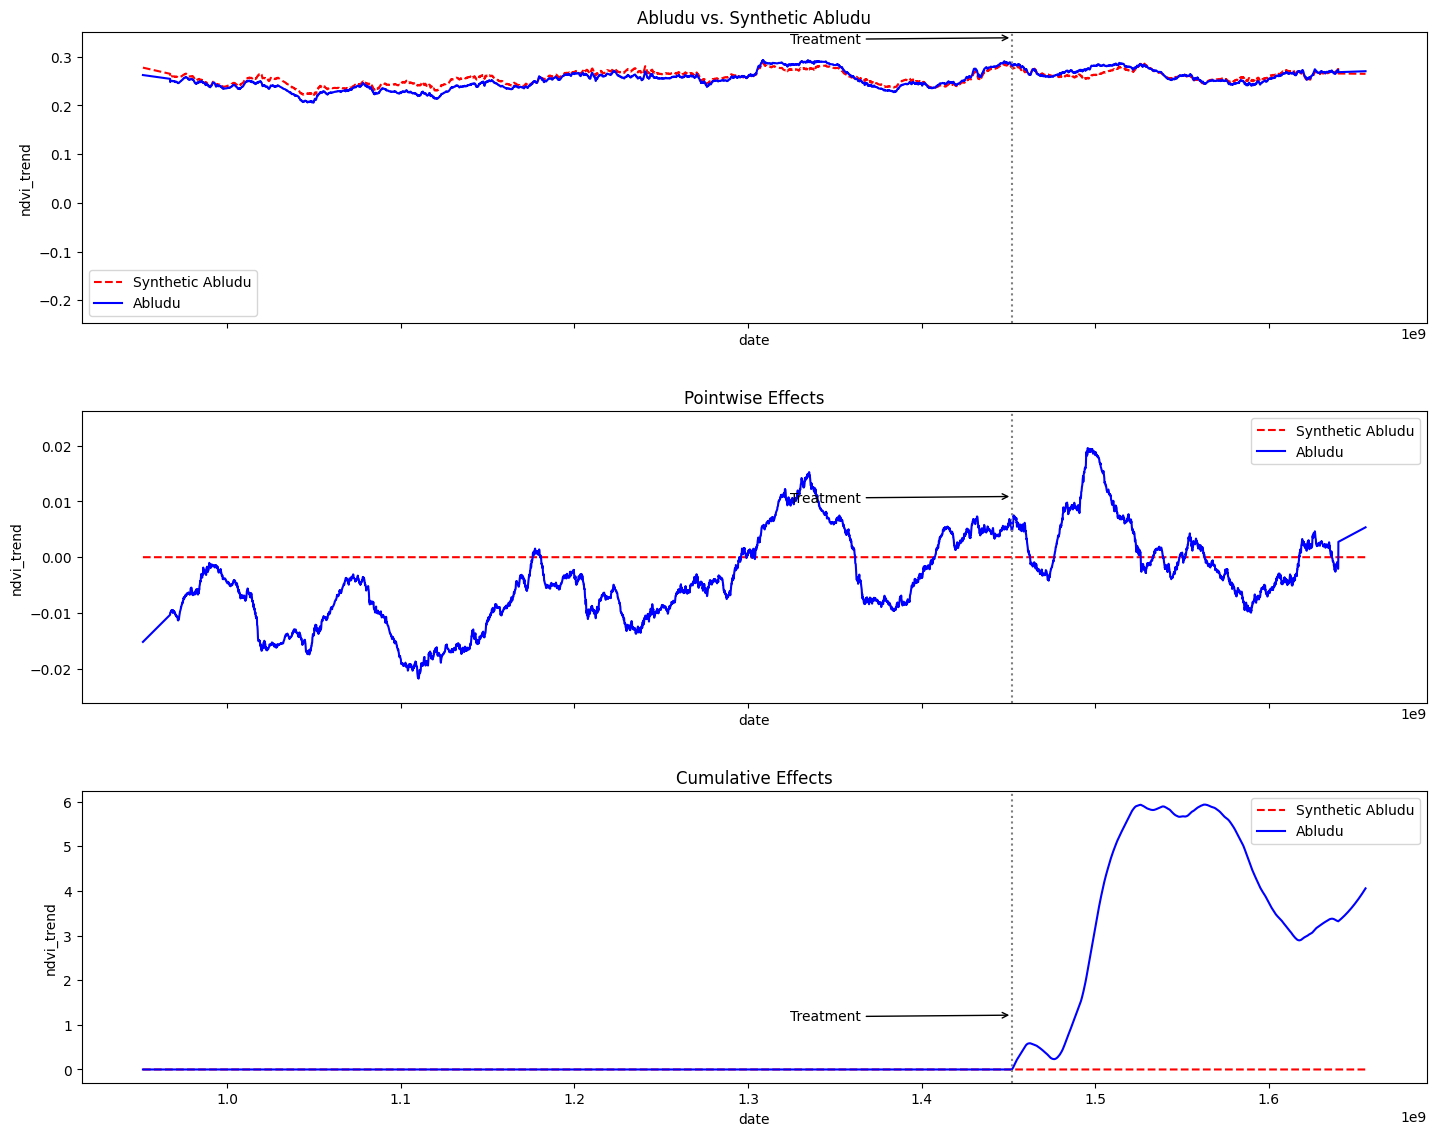

In [171]:
# Consider for gp Abludu with date 1452038400
gp = 'Abludu'
date = 1452038400

sc = Synth(df_final, "ndvi_trend", "gp", "date", date, gp, pen=0)
sc.plot(["original", "pointwise", "cumulative"], treated_label=gp, 
            synth_label="Synthetic " + gp, treatment_label="Treatment")

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.53359D-01    |proj g|=  8.57143D-01

At iterate    3    f=  8.25842D-01    |proj g|=  8.57069D-01

At iterate    6    f=  8.16916D-01    |proj g|=  8.57539D-01

At iterate    9    f=  8.12374D-01    |proj g|=  8.57824D-01

At iterate   12    f=  8.12325D-01    |proj g|=  8.57823D-01

At iterate   15    f=  8.11896D-01    |proj g|=  8.57739D-01
  ys=-1.794E-07  -gs= 2.938E-07 BFGS update SKIPPED
  ys=-8.534E-07  -gs= 1.610E-06 BFGS update SKIPPED

At iterate   18    f=  8.11892D-01    |proj g|=  8.57739D-01
  ys=-9.445E-16  -gs= 1.684E-15 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   21    f=  8.11891D-01    |proj g|=  8.57739D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     21    165     41     3     6   8.577D-01   8.119D-01
  F =  0.81189143406017183     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.57235D-01    |proj g|=  9.99504D-01

At iterate    3    f=  8.57234D-01    |proj g|=  3.56236D-01
  ys=-3.844E-07  -gs= 7.724E-07 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      6     75     19     1     7   3.562D-01   8.572D-01
  F =  0.85723366210863072     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.57766D-01    |proj g|=  3.96992D-01



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.


  ys=-5.132E-05  -gs= 1.979E-04 BFGS update SKIPPED



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      2     37     14     1     7   3.970D-01   8.578D-01
  F =  0.85776607170581010     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.64715D-01    |proj g|=  9.94902D-01

At iterate    3    f=  8.64714D-01    |proj g|=  4.33957D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      4     62     17     0     7   4.340D-01   8.647D-01
  F =  0.86471433218522487     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.48905D-01    |proj g|=  2.89764D-01



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      1     21      7     0     6   2.898D-01   8.489D-01
  F =  0.84890537626880702     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.78781D-01    |proj g|=  9.64425D-01

At iterate    3    f=  8.78779D-01    |proj g|=  9.64423D-01
  ys=-1.999E-07  -gs= 6.557E-08 BFGS update SKIPPED
  ys=-7.818E-08  -gs= 1.984E-07 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      5     80     18     2     7   2.912D-01   8.788D-01
  F =  0.87877856108627406     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.54999D-01    |proj g|=  9.36285D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate    3    f=  8.54998D-01    |proj g|=  3.11469D-01
  ys=-4.189E-08  -gs= 1.057E-07 BFGS update SKIPPED



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      4     77     23     1     7   3.115D-01   8.550D-01
  F =  0.85499849428206542     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.60127D-01    |proj g|=  9.83240D-01

At iterate    3    f=  8.60126D-01    |proj g|=  8.70880D-01
  ys=-9.807E-07  -gs= 3.792E-07 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      5     71     18     1     7   3.602D-01   8.601D-01
  F =  0.86012622081027923     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.58353D-01    |proj g|=  9.82340D-01

At iterate    3    f=  8.58353D-01    |proj g|=  5.18597D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments 


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate    3    f=  8.26483D-01    |proj g|=  6.83870D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      4     48     17     0     0   5.233D-01   8.265D-01
  F =  0.82648316980016012     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


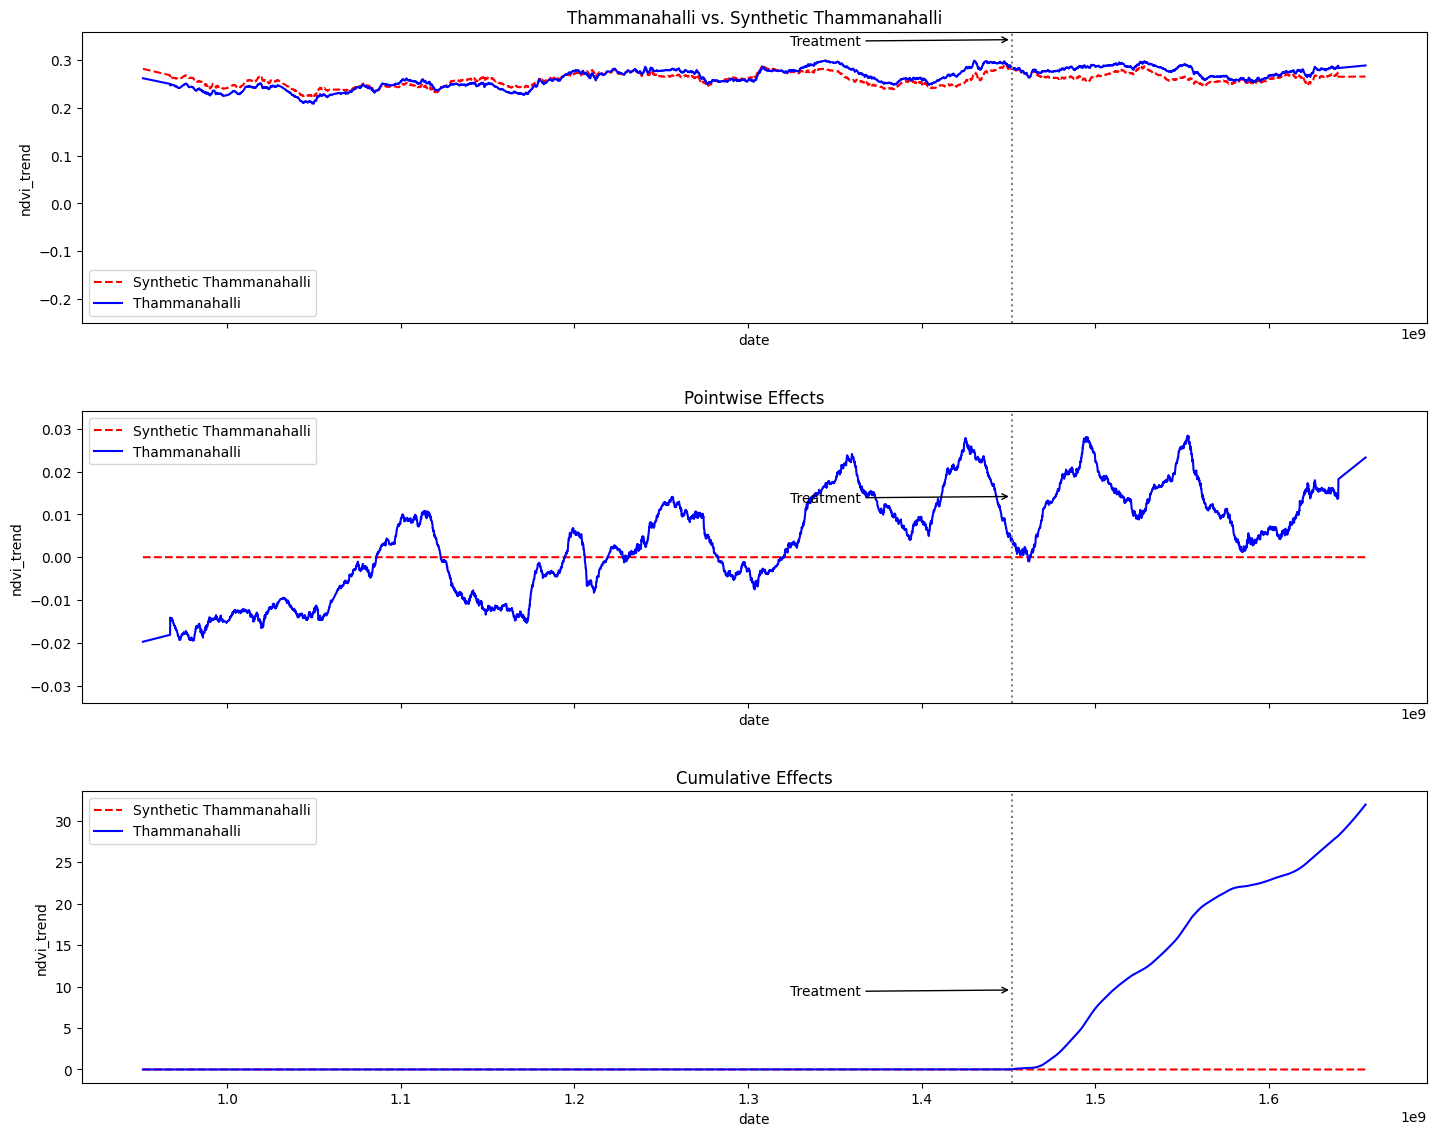

In [172]:
# Consider for gp Thammanahalli with date 1451865600

gp = 'Thammanahalli'
date = 1451865600

sc = Synth(df_final, "ndvi_trend", "gp", "date", date, gp, pen=0)
sc.plot(["original", "pointwise", "cumulative"], treated_label=gp, 
            synth_label="Synthetic " + gp, treatment_label="Treatment")